In [2]:
import argparse
import pandas as pd
import numpy as np
import seaborn as sns

from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import squareform
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('BitScoreMatrix.csv', index_col=0)

In [4]:
df.head()

,1.A.17.1.1,1.A.17.1.10,1.A.17.1.11,1.A.17.1.12,1.A.17.1.13,1.A.17.1.14,1.A.17.1.15,1.A.17.1.16,1.A.17.1.17,1.A.17.1.18,...,1.A.17.6.3,1.A.17.6.4,1.A.17.6.5,1.A.17.6.6,1.A.17.6.7,1.A.17.7.1,1.A.17.7.2,1.A.17.7.3,1.A.17.7.4,1.A.17.7.5
1.A.17.1.1,1608.8,99.6,87.4,73.3,89.4,159.2,90.2,123.0,88.5,31.3,...,22.5,26.0,32.4,24.1,23.2,26.7,26.0,23.4,NaN,29.1
1.A.17.1.10,104.7,1276.0,114.1,103.0,118.2,152.4,97.1,124.8,141.2,152.3,...,NaN,NaN,NaN,25.5,NaN,NaN,NaN,27.2,NaN,26.0
1.A.17.1.11,95.6,118.9,964.0,90.8,86.8,143.5,79.5,120.5,122.2,109.6,...,NaN,22.5,22.1,23.4,NaN,NaN,NaN,26.0,NaN,NaN
1.A.17.1.12,82.3,111.0,93.7,2211.9,33.0,119.3,61.8,175.8,87.1,78.8,...,32.6,23.5,23.0,23.6,30.9,NaN,32.8,29.9,28.9,NaN
1.A.17.1.13,98.0,123.7,87.0,32.3,1938.1,184.9,90.2,44.6,100.4,113.9,...,28.7,24.2,23.0,23.9,26.7,30.7,23.5,30.5,27.7,31.1


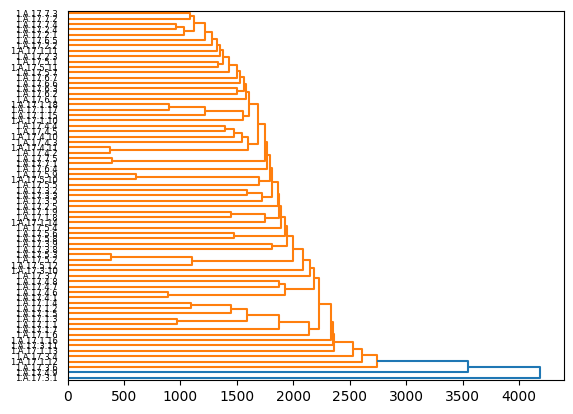

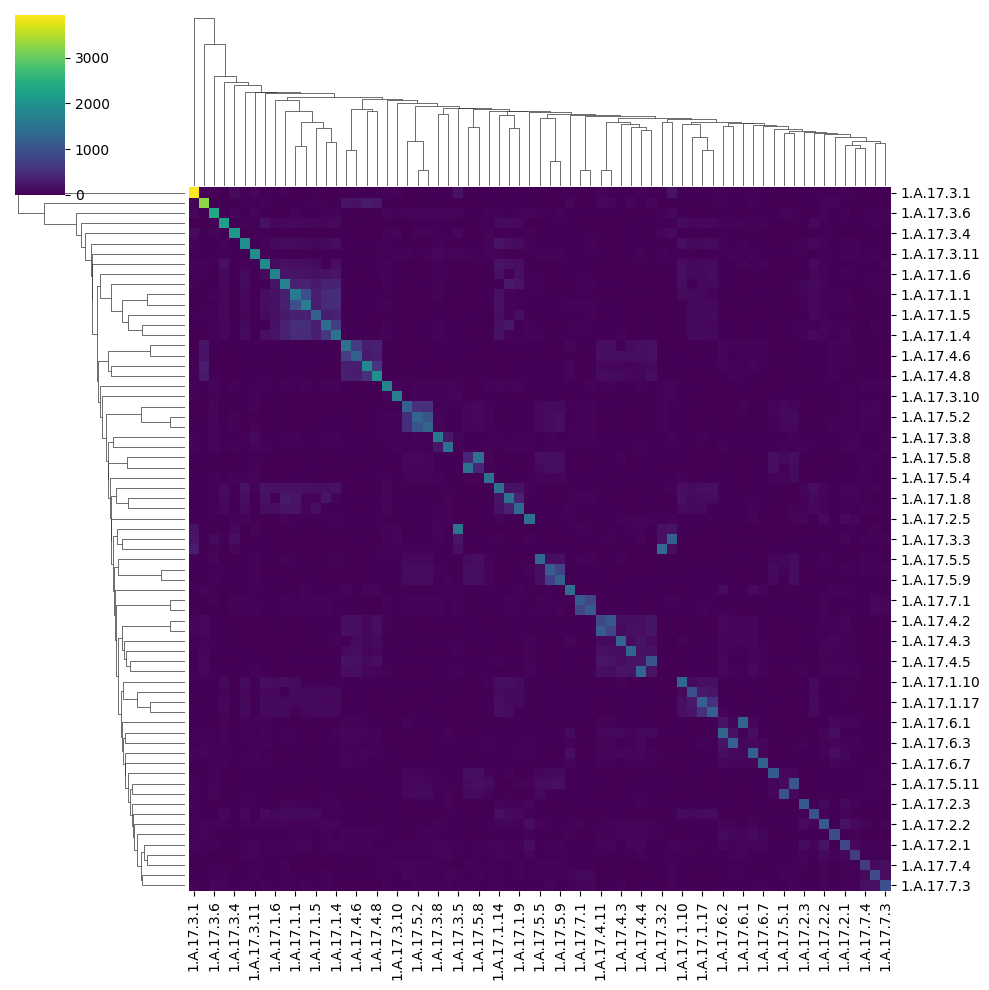

In [5]:
# Check if the DataFrame contains any non-finite values
if not np.all(np.isfinite(df)):
    # Handle non-finite values
    df = df.fillna(0)  # replace NaNs with 0
    df = df.replace([np.inf, -np.inf], 0)  # replace infinities with 0

# Perform hierarchical/agglomerative clustering
linked = linkage(df, 'average')

# Draw the dendrogram
dendrogram(linked, labels = df.index, orientation = 'right')

# Draw the heatmap with dendrograms
sns.clustermap(df, method ='average', cmap='viridis')